In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.stats import entropy
import seaborn as sns

In [3]:
df = pd.read_csv("q2.csv")

In [4]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [5]:
df.shape #(num_records, num_variables)

(1573, 43)

In [6]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


In [7]:
for col in df.columns:
    print(col, ": ", len(df[col].unique()))
    # dropping cols with only 1 unique value
    if len(df[col].unique())==1:
        df.drop(col, axis=1, inplace=True)

title :  1201
title_orig :  1203
price :  127
retail_price :  104
currency_buyer :  1
units_sold :  15
uses_ad_boosts :  2
rating :  192
rating_count :  761
rating_five_count :  606
rating_four_count :  441
rating_three_count :  385
rating_two_count :  263
rating_one_count :  331
badges_count :  4
badge_local_product :  2
badge_product_quality :  2
badge_fast_shipping :  2
tags :  1230
product_color :  102
product_variation_size_id :  107
product_variation_inventory :  48
shipping_option_name :  15
shipping_option_price :  8
shipping_is_express :  2
countries_shipped_to :  94
inventory_total :  10
has_urgency_banner :  2
urgency_text :  3
origin_country :  7
merchant_title :  958
merchant_name :  958
merchant_info_subtitle :  1059
merchant_rating_count :  917
merchant_rating :  952
merchant_id :  958
merchant_has_profile_picture :  2
merchant_profile_picture :  126
product_url :  1341
product_picture :  1341
product_id :  1341
theme :  1
crawl_month :  1


In [8]:
s = """
title: nominal
title_orig: nominal
price: continuous
retail_price: continuous
currency_buyer: nominal
units_sold: integer
uses_ad_boosts: integer
rating: continuous
rating_count: integer
rating_five_count: integer
rating_four_count: integer
rating_three_count: integer
rating_two_count: integer
rating_one_count: integer
badges_count: ordinal
badge_local_product: nominal
badge_product_quality: nominal
badge_fast_shipping: nominal
tags: nominal
product_color: nominal
product_variation_size_id: ordinal
product_variation_inventory: integer
shipping_option_name: nominal
shipping_option_price: integer
shipping_is_express: nominal
countries_shipped_to: integer
inventory_total: integer
has_urgency_banner: nominal
urgency_text: nominal
origin_country: nominal
merchant_title: nominal
merchant_name: nominal
merchant_info_subtitle: ordinal
merchant_rating_count: integer
merchant_rating: continuous
merchant_id: nominal
merchant_has_profile_picture: nominal
merchant_profile_picture: nominal
product_url: nominal
product_picture: nominal
product_id: nominal
theme: nominal
crawl_month: temporal
"""
print("categorization: ")
print(s)

categorization: 

title: nominal
title_orig: nominal
price: continuous
retail_price: continuous
currency_buyer: nominal
units_sold: integer
uses_ad_boosts: integer
rating: continuous
rating_count: integer
rating_five_count: integer
rating_four_count: integer
rating_three_count: integer
rating_two_count: integer
rating_one_count: integer
badges_count: ordinal
badge_local_product: nominal
badge_product_quality: nominal
badge_fast_shipping: nominal
tags: nominal
product_color: nominal
product_variation_size_id: ordinal
product_variation_inventory: integer
shipping_option_name: nominal
shipping_option_price: integer
shipping_is_express: nominal
countries_shipped_to: integer
inventory_total: integer
has_urgency_banner: nominal
urgency_text: nominal
origin_country: nominal
merchant_title: nominal
merchant_name: nominal
merchant_info_subtitle: ordinal
merchant_rating_count: integer
merchant_rating: continuous
merchant_id: nominal
merchant_has_profile_picture: nominal
merchant_profile_picture:

In [9]:
# printing num_missing_entries
num_no_missing=0
for col in df.columns:
    print(col, ": ", df[col].isnull().sum())
    if np.sum(df[col].isnull())==0:
        num_no_missing+=1
    # dropping cols with way too many empty entries
    if df[col].isnull().sum()>=(df.shape[0]/2):
        df.drop(col, axis=1, inplace=True)

title :  0
title_orig :  0
price :  0
retail_price :  0
units_sold :  0
uses_ad_boosts :  0
rating :  0
rating_count :  0
rating_five_count :  45
rating_four_count :  45
rating_three_count :  45
rating_two_count :  45
rating_one_count :  45
badges_count :  0
badge_local_product :  0
badge_product_quality :  0
badge_fast_shipping :  0
tags :  0
product_color :  41
product_variation_size_id :  14
product_variation_inventory :  0
shipping_option_name :  0
shipping_option_price :  0
shipping_is_express :  0
countries_shipped_to :  0
inventory_total :  0
has_urgency_banner :  1100
urgency_text :  1100
origin_country :  17
merchant_title :  0
merchant_name :  4
merchant_info_subtitle :  1
merchant_rating_count :  0
merchant_rating :  0
merchant_id :  0
merchant_has_profile_picture :  0
merchant_profile_picture :  1347
product_url :  0
product_picture :  0
product_id :  0


In [10]:
# num_cols with no missing data
print(num_no_missing)

27


In [11]:
for col in df.columns:
    try:
        vals, counts = np.unique(df[col], return_counts=True)
    except:
        vals, counts = np.unique(np.array(df[col], dtype=str), return_counts=True)
    max_count = np.max(counts)
    if max_count > 0.95*df.shape[0]:
        print(col, " has been droppped since 95% of the values were the same")
        df.drop(col, inplace=True, axis=1)

badge_local_product  has been droppped since 95% of the values were the same
badge_fast_shipping  has been droppped since 95% of the values were the same
shipping_option_name  has been droppped since 95% of the values were the same
shipping_is_express  has been droppped since 95% of the values were the same
inventory_total  has been droppped since 95% of the values were the same
origin_country  has been droppped since 95% of the values were the same


In [12]:
redundant_cols=["product_url", "product_picture"] # can be found from product_id
redundant_cols += ["merchant_has_profile_picture"] # since merchant_profile_picture is NaN mostly, this var is mostly 0

# since rating and rating_count are available, individual counts wont be too helpful
redundant_cols += ["rating_five_count", "rating_four_count", "rating_three_count",
                   "rating_two_count", "rating_one_count"]
redundant_cols += ["title", "title_orig",
                   "merchant_title", "merchant_name", "merchant_info_subtitle"] # since these wont provide too much insight
redundant_cols += ["tags"] # this will need preprocessing in order to get insights out of them, and so I chose to skip this
redundant_cols += ["merchant_id", "product_id"] # as they won't give significant insights

In [13]:
print(df["product_variation_size_id"].unique())

['M' 'XS' 'S' 'Size-XS' 'M.' 'XXS' 'L' 'XXL' nan 'S.' 's' 'choose a size'
 'XS.' '32/L' 'Suit-S' 'XXXXXL' 'EU 35' '4' 'Size S.' '1m by 3m' '3XL'
 'Size S' 'XL' 'Women Size 36' 'US 6.5 (EU 37)' 'XXXS' 'SIZE XS'
 '26(Waist 72cm 28inch)' 'Size XXS' '29' '1pc' '100 cm' 'One Size'
 'SIZE-4XL' '1' 'S/M(child)' '2pcs' 'XXXL' 'S..' '30 cm' '5XL' '33'
 'Size M' '100 x 100cm(39.3 x 39.3inch)' '100pcs' '2XL' '4XL' 'SizeL'
 'SIZE XXS' 'XXXXL' 'Base & Top & Matte Top Coat' 'size S' '35' '34'
 'SIZE-XXS' 'S(bust 88cm)' 'S (waist58-62cm)' 'S(Pink & Black)' '20pcs'
 'US-S' 'Size -XXS' 'X   L' 'White' '25' 'Size-S' 'Round' 'Pack of 1'
 '1 pc.' 'S Diameter 30cm' '6XL' 'AU plug Low quality' '5PAIRS' '25-S'
 'Size/S' 'S Pink' 'Size-5XL' 'daughter 24M' '2' 'Baby Float Boat' '10 ml'
 '60' 'Size-L' 'US5.5-EU35' '10pcs' '17' 'Size-XXS' 'Women Size 37'
 '3 layered anklet' '4-5 Years' 'Size4XL' 'first  generation'
 '80 X 200 CM' 'EU39(US8)' 'L.' 'Base Coat' '36' '04-3XL' 'pants-S'
 'Floating Chair for Kid' '20P

In [14]:
def process_size(s):
    s=str(s)
    s=s.lower()
    s = s.replace(" ", "")
    s = s.replace("size", "")
    s = s.replace(".",  "")
    s = s.replace("-", "")
    try:
        s_0 = int(s[0])
        if s[1]=="x":
            s_pre = "x"*(s_0-1)
            s = s_pre + s[1:]
    except:
        pass
    return s

In [15]:
df.drop(redundant_cols, axis=1, inplace=True)

In [16]:
df["product_variation_size_id"]=df["product_variation_size_id"].apply(process_size)

In [17]:
df.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,countries_shipped_to,merchant_rating_count,merchant_rating
0,16.00,14,100,0,3.76,54,0,0,white,m,50,4,34,568,4.128521
1,8.00,22,20000,1,3.45,6135,0,0,green,xs,50,2,41,17752,3.899673
2,8.00,43,100,0,3.57,14,0,0,leopardprint,xs,1,3,36,295,3.989831
3,8.00,8,5000,1,4.03,579,0,0,black,m,50,2,41,23832,4.020435
4,2.72,3,100,1,3.10,20,0,0,yellow,s,1,1,35,14482,4.001588


In [18]:
df.shape

(1573, 15)

In [19]:
df.dtypes

price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                   int64
rating                         float64
rating_count                     int64
badges_count                     int64
badge_product_quality            int64
product_color                   object
product_variation_size_id       object
product_variation_inventory      int64
shipping_option_price            int64
countries_shipped_to             int64
merchant_rating_count            int64
merchant_rating                float64
dtype: object

In [20]:
# categorization
print("""
      the above dtypes are the respective variable categories for integer and float types
      hence, int64 is integer datatype and float64 is continuous
      all columns with object dtype are categorical
      exceptions: 
          uses_ad_boosts, badge_product_quality are categorical (not integer)
      there are no temporal/ordinal variables
      """
     )


      the above dtypes are the respective variable categories for integer and float types
      hence, int64 is integer datatype and float64 is continuous
      all columns with object dtype are categorical
      exceptions: 
          uses_ad_boosts, badge_product_quality are categorical (not integer)
      there are no temporal/ordinal variables
      


In [21]:
# manually categorizing vars
discrete_vars=["uses_ad_boosts", "badges_count", "badge_product_quality",
               "product_color", "product_variation_size_id"]
continuous_vars=[]
for col in df.columns:
    if col not in discrete_vars:
        continuous_vars.append(col)

In [22]:
# preprocessing product_color
vals, counts = np.unique(np.array(df["product_color"], dtype=str), return_counts=True)
vals = vals[counts.argsort()[::-1]] # most frequent vals
def reduce_colors(color):
    # if it is a frequent color, then keep
    if color in vals[:14]:
        return color
    # else categorize as others
    return "other"

In [23]:
df["product_color"]=df["product_color"].apply(reduce_colors)

<ipython-input-22-3721164388f6>:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if color in vals[:14]:


In [24]:
# preprocessing product_color
vals, counts = np.unique(np.array(df["product_variation_size_id"], dtype=str), return_counts=True)
vals = vals[counts.argsort()[::-1]] # most frequent vals
def reduce_sizes(size):
    # if it is a frequent size, then keep
    if size in vals[:10]:
        return size
    # else categorize as others
    return "nan"

In [25]:
df["product_variation_size_id"]=df["product_variation_size_id"].apply(reduce_sizes)

uses_ad_boosts


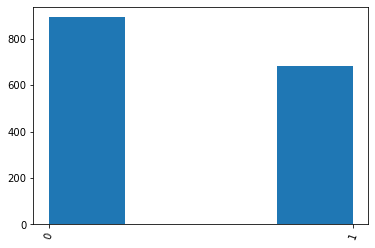

badges_count


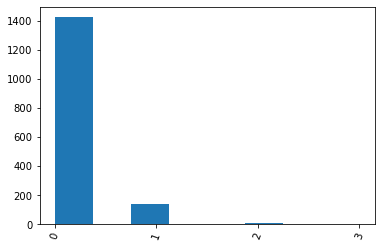

badge_product_quality


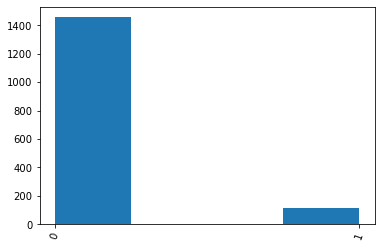

product_color


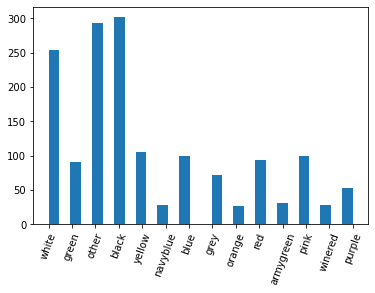

product_variation_size_id


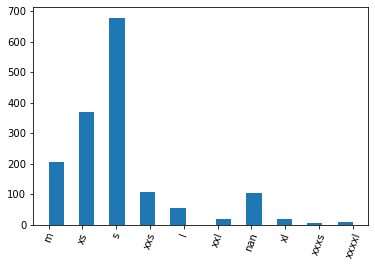

In [26]:
for col in discrete_vars:
    print(col)
    plt.hist(np.array(df[col].dropna(), dtype=str), bins=len(df[col].unique())*2)
    plt.xticks(rotation="70")
    plt.show()

In [27]:
# modes printed in form: [mode_values], count
for col in discrete_vars:
    try:
        vals, counts = np.unique(df[col], return_counts=True)
    except:
        vals, counts = np.unique(np.array(df[col], dtype=str), return_counts=True)
    max_count = np.max(counts)
    print(col)
    print(vals[counts==max_count], max_count)
    print()

uses_ad_boosts
[0] 892

badges_count
[0] 1422

badge_product_quality
[0] 1456

product_color
['black'] 302

product_variation_size_id
['s'] 679



In [28]:
for col in discrete_vars:
    try:
        vals, counts = np.unique(df[col], return_counts=True)
    except:
        vals, counts = np.unique(np.array(df[col], dtype=str), return_counts=True)
    print(col, entropy(counts))

uses_ad_boosts 0.684123424514612
badges_count 0.34790605890694465
badge_product_quality 0.2648244730258604
product_color 2.3286629661369496
product_variation_size_id 1.6061694652998544


In [29]:
# only uses_ad_boosts and badge_product_quality have very little diversity
# all others have diversity

In [30]:
# mean, std, min, first quartile, median, third quartile, max
print(df[continuous_vars].describe())

             price  retail_price     units_sold       rating  rating_count  \
count  1573.000000   1573.000000    1573.000000  1573.000000   1573.000000   
mean      8.325372     23.288620    4339.005086     3.820896    889.659250   
std       3.932030     30.357863    9356.539302     0.515374   1983.928834   
min       1.000000      1.000000       1.000000     1.000000      0.000000   
25%       5.810000      7.000000     100.000000     3.550000     24.000000   
50%       8.000000     10.000000    1000.000000     3.850000    150.000000   
75%      11.000000     26.000000    5000.000000     4.110000    855.000000   
max      49.000000    252.000000  100000.000000     5.000000  20744.000000   

       product_variation_inventory  shipping_option_price  \
count                  1573.000000            1573.000000   
mean                     33.081373               2.345200   
std                      21.353137               1.024371   
min                       1.000000               1.00

In [31]:
# variance
print(df[continuous_vars].var())

price                          1.546086e+01
retail_price                   9.215999e+02
units_sold                     8.754483e+07
rating                         2.656099e-01
rating_count                   3.935974e+06
product_variation_inventory    4.559565e+02
shipping_option_price          1.049336e+00
countries_shipped_to           4.121388e+02
merchant_rating_count          6.158240e+09
merchant_rating                4.192993e-02
dtype: float64


In [32]:
# interquartile range
print(df[continuous_vars].quantile(0.75)-df[continuous_vars].quantile(0.25))

price                              5.190000
retail_price                      19.000000
units_sold                      4900.000000
rating                             0.560000
rating_count                     831.000000
product_variation_inventory       44.000000
shipping_option_price              1.000000
countries_shipped_to              12.000000
merchant_rating_count          22577.000000
merchant_rating                    0.244443
dtype: float64


In [33]:
# skew
print(df[continuous_vars].skew())

price                           1.315891
retail_price                    2.742709
units_sold                      5.624840
rating                         -0.530912
rating_count                    4.789467
product_variation_inventory    -0.565653
shipping_option_price           1.365252
countries_shipped_to            2.961890
merchant_rating_count          15.889019
merchant_rating                -1.029755
dtype: float64


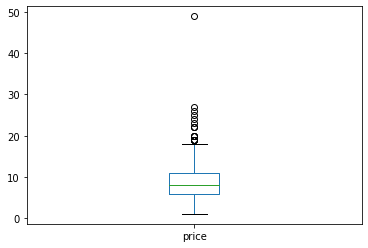

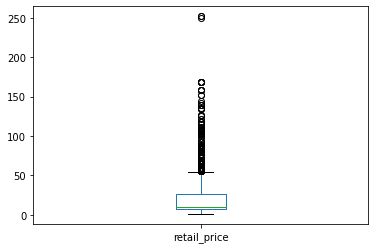

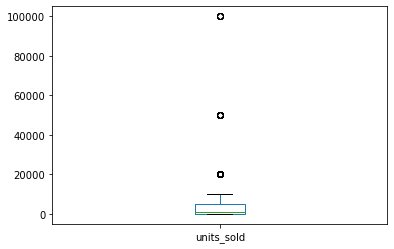

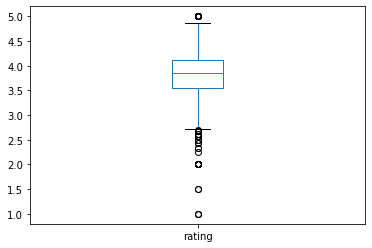

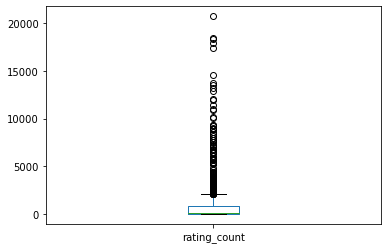

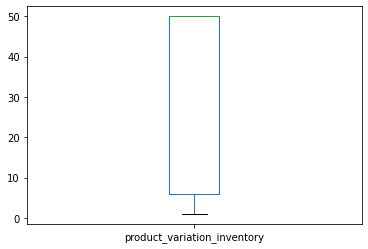

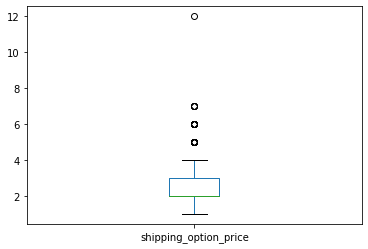

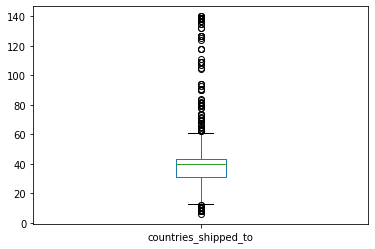

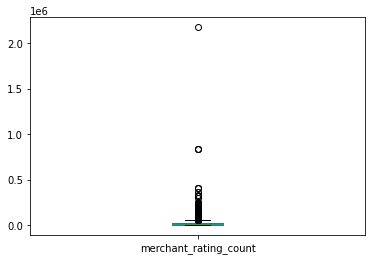

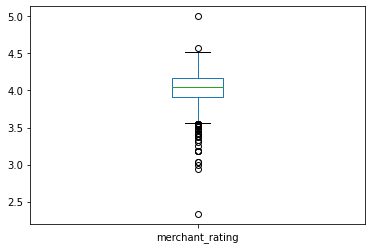

In [34]:
# box and whisker plot
for col in continuous_vars:
    df[col].plot.box()
    plt.show()

In [35]:
# both inventory variables, shipping_option_price, badges count
# have one value occuring very frequently

price


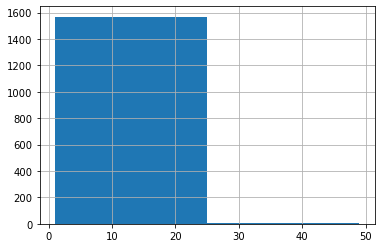

retail_price


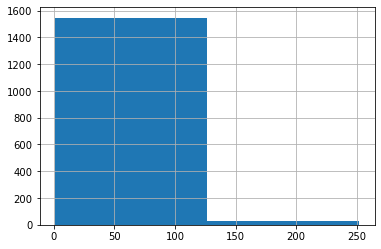

units_sold


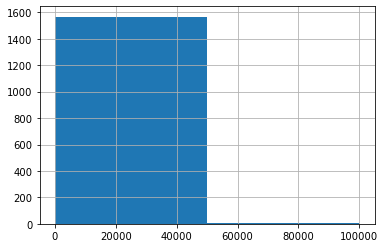

rating


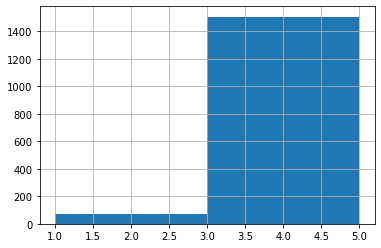

rating_count


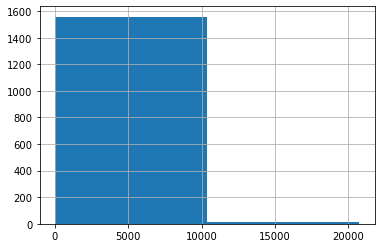

product_variation_inventory


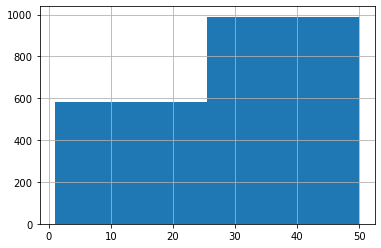

shipping_option_price


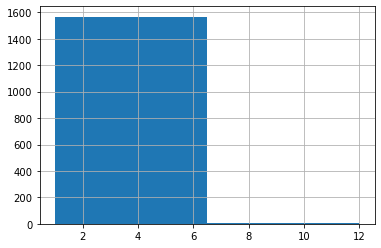

countries_shipped_to


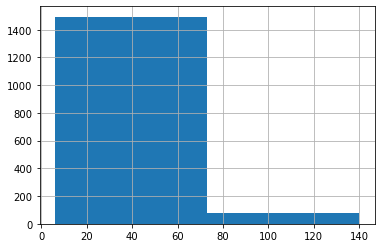

merchant_rating_count


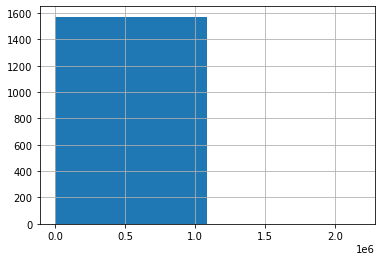

merchant_rating


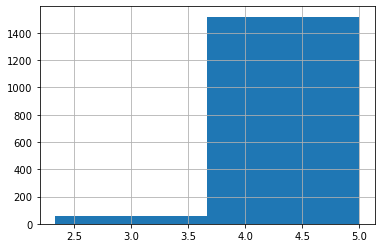

In [36]:
# histogram too few bins
for col in continuous_vars:
    df[col].hist(bins=2)
    print(col)
    plt.show()

price


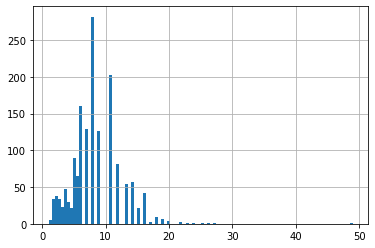

retail_price


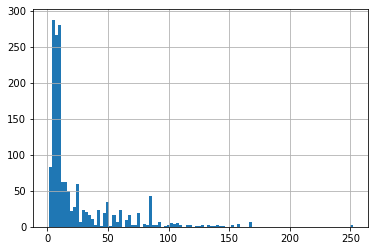

units_sold


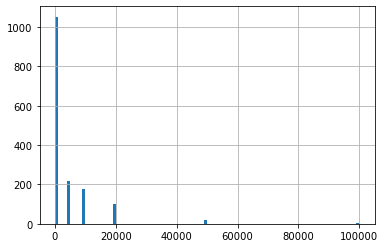

rating


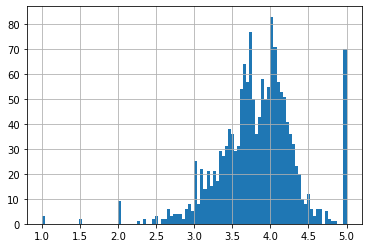

rating_count


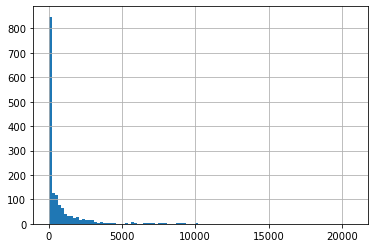

product_variation_inventory


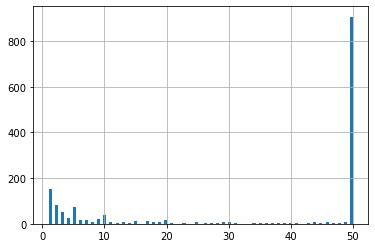

shipping_option_price


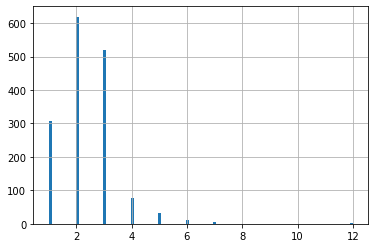

countries_shipped_to


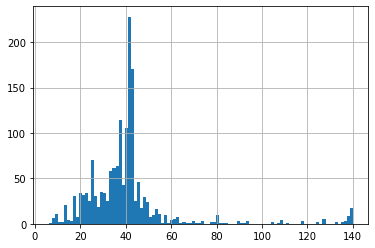

merchant_rating_count


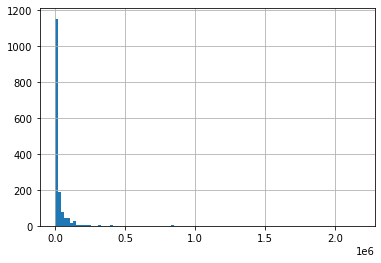

merchant_rating


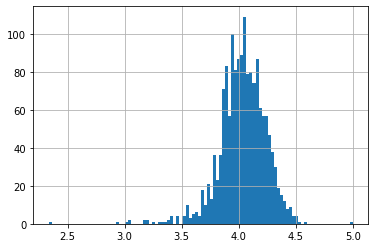

In [37]:
# histogram too many bins
for col in continuous_vars:
    df[col].hist(bins=100)
    print(col)
    plt.show()

price


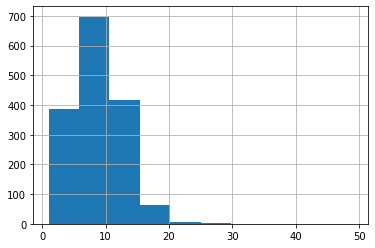

retail_price


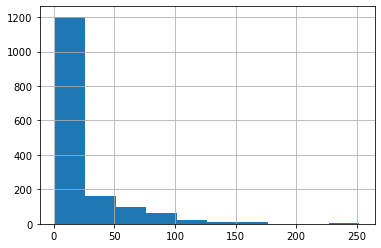

units_sold


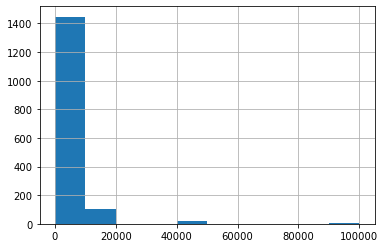

rating


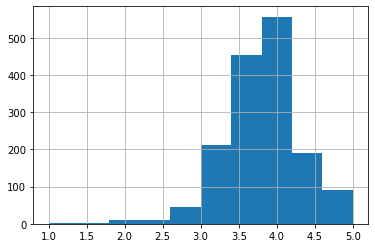

rating_count


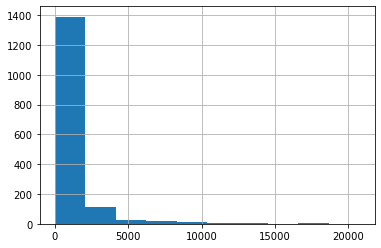

product_variation_inventory


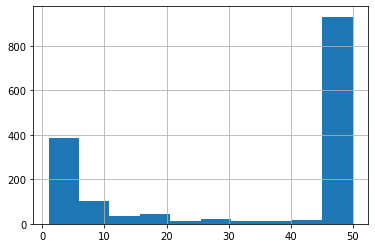

shipping_option_price


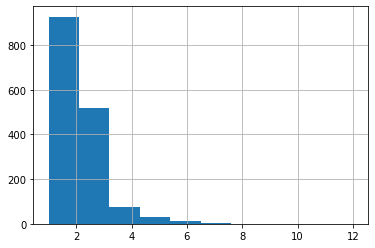

countries_shipped_to


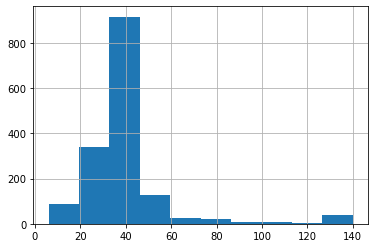

merchant_rating_count


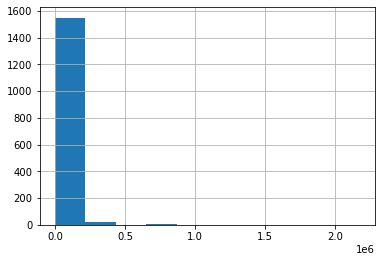

merchant_rating


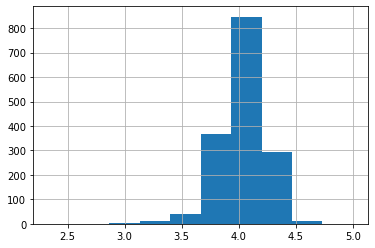

In [38]:
# histogram sufficient bins
for col in continuous_vars:
    df[col].hist(bins=10)
    print(col)
    plt.show()

price


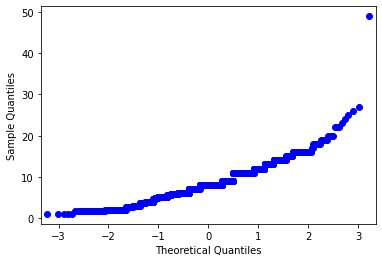

retail_price


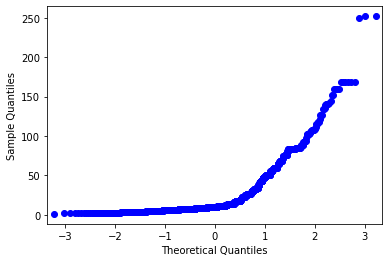

units_sold


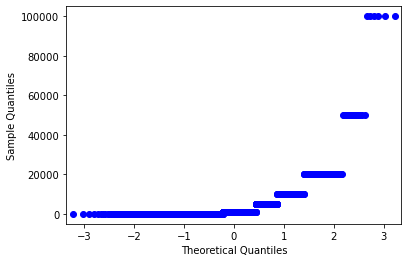

rating


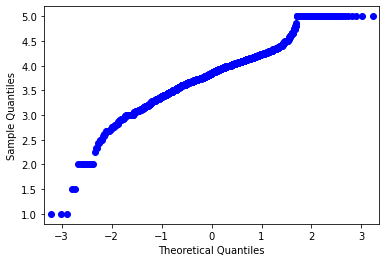

rating_count


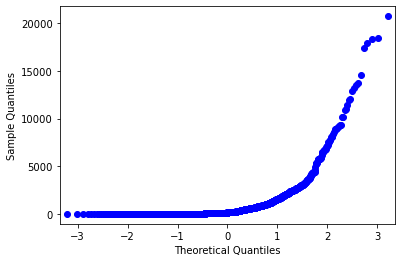

product_variation_inventory


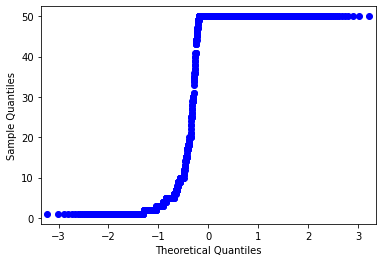

shipping_option_price


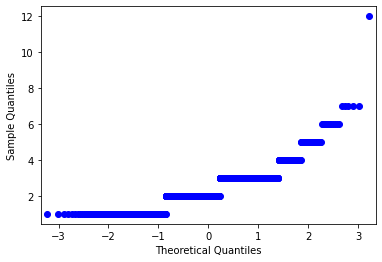

countries_shipped_to


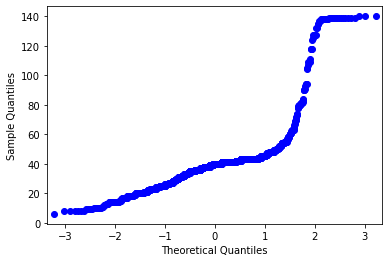

merchant_rating_count


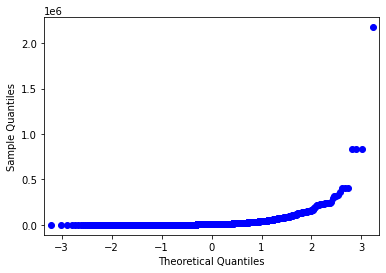

merchant_rating


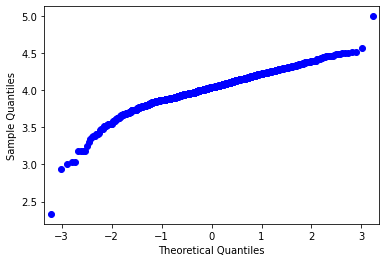

In [39]:
import statsmodels.api as sm

for col in continuous_vars:
    print(col)
    fig = sm.qqplot(df[col].dropna())
    plt.show()

In [40]:
# all variables are right skewed
# except merchant_rating: left skewed
# and rating, product_variation_inventory: normal

price


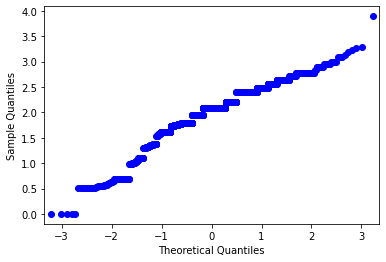

retail_price


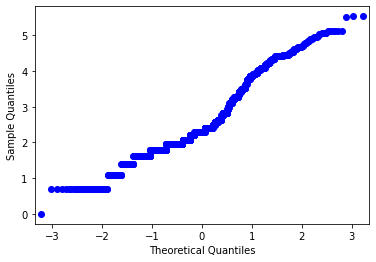

units_sold


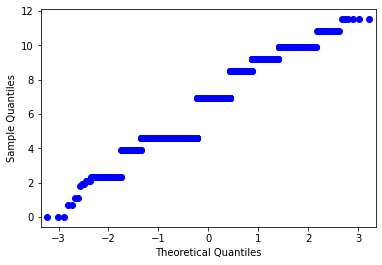

rating


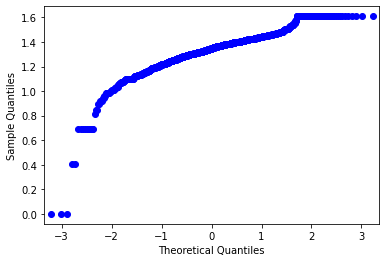

rating_count


C:\Users\drbha\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


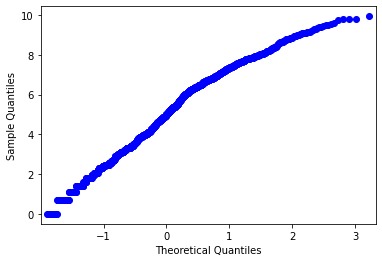

product_variation_inventory


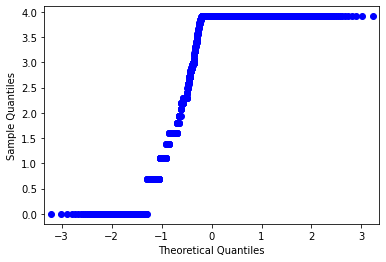

shipping_option_price


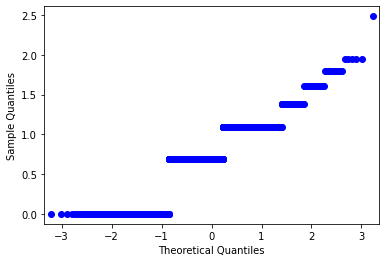

countries_shipped_to


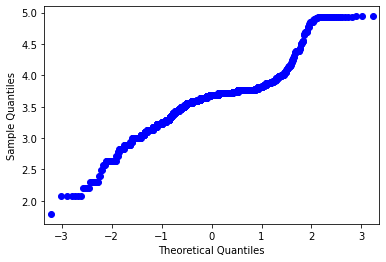

merchant_rating_count


C:\Users\drbha\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


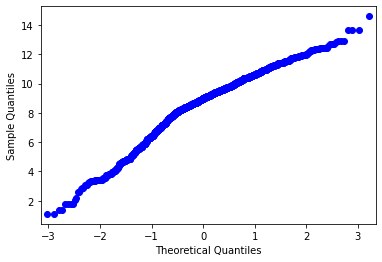

merchant_rating


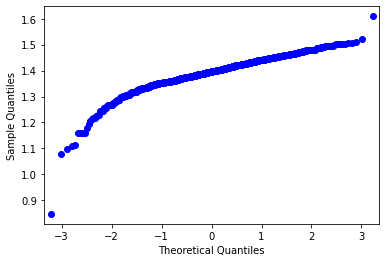

In [41]:
for col in continuous_vars:
    print(col)
    fig = sm.qqplot(np.log(df[col].dropna()))
    plt.show()

In [42]:
# all variables except merchant_rating and rating are log-normal

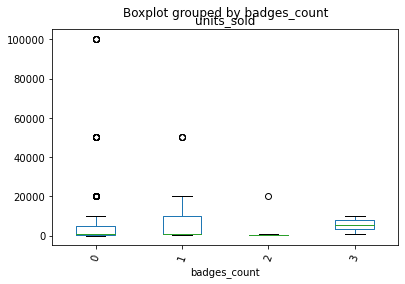

In [43]:
# units_sold plotted against badges_count
df.boxplot(by='badges_count', column='units_sold',grid=False)
plt.xticks(rotation="70")
plt.show()
# products with 3 badges sell better on average

(-5.0, 25.0)

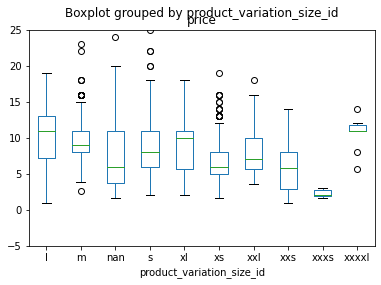

In [44]:
# price plotted against size
df.boxplot(by='product_variation_size_id', column='price',grid=False)
plt.ylim(-5, 25)
# l sizes are generally more expensive

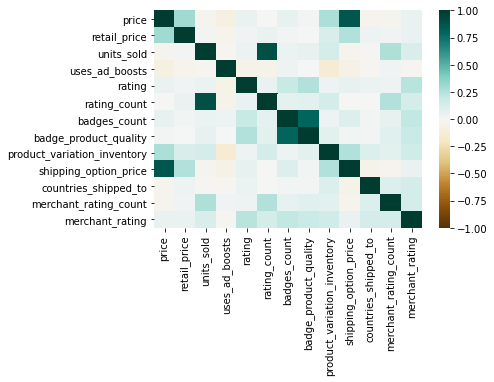

In [45]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BrBG')
plt.show()

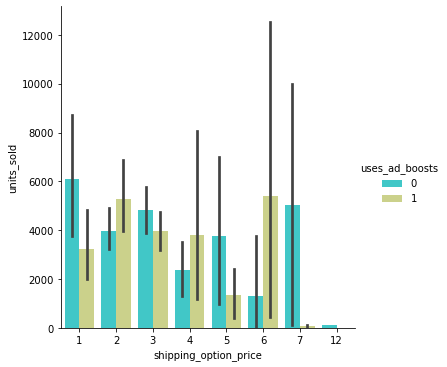

In [46]:
# seeing wether ad boosts affect sales, and wether they affect the sale more/less as shipping_price changes
sns.catplot(x="shipping_option_price", y="units_sold", hue="uses_ad_boosts", kind = 'bar', data=df, palette = "rainbow")

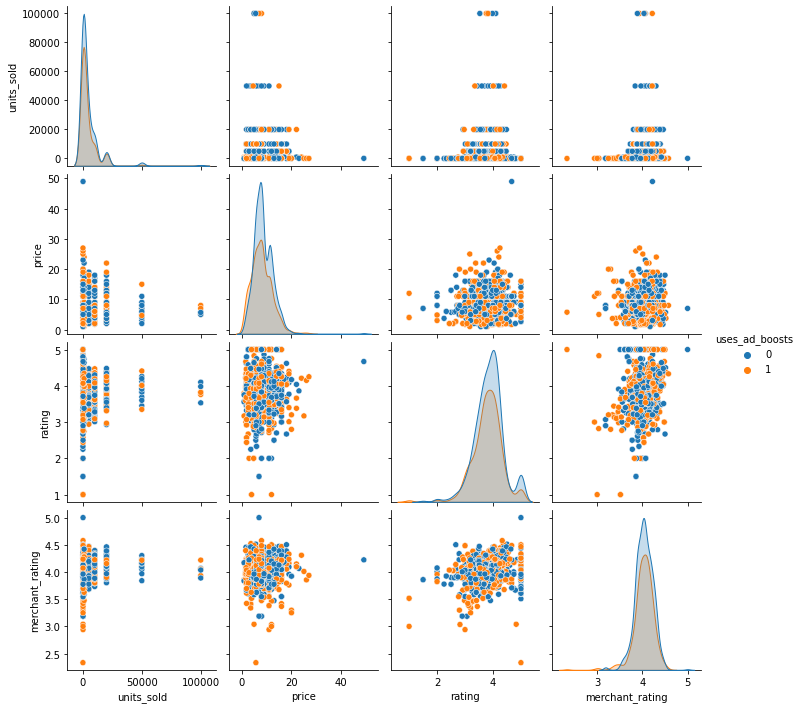

In [47]:
# comparing every variable to every other variable and seeing if ad boosts affect their relation
sns.pairplot(df[["uses_ad_boosts", "units_sold", "price", "rating", "merchant_rating"]], hue="uses_ad_boosts")

In [48]:
# example:
# to sell the same number of units with ad_boost
# a higher price is charged

In [49]:
# in general, ad boost reduces the number of units_sold, instead of increasing it
# and this might be since the price for items with ad_boost is generally higher

In [50]:
# similarly, ad_boost also appears to have a badd effect on product and merchant rating